# Exploratory Data Analysis

## Imports

In [130]:
# Std lib:
import warnings

# Data manipulation:
import numpy as np
import pandas as pd
import geopandas
from shapely.geometry import Point, Polygon

# Visualization:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
style.use('seaborn')

# Display all columns in Jupyter:
from IPython.display import display
pd.options.display.max_columns = None

# Filter Warnings
warnings.filterwarnings('ignore')

## Pull in the Data

In [131]:
datatypes = {'block': 'object',
             'iucr': 'object',
             'primary_type': 'object',
             'description': 'object',
             'location_description': 'object',
             'arrest': 'bool',
             'domestic': 'bool',
             'beat': 'int64',
             'district': 'float64',
             'ward': 'float64',
             'community_area': 'int64',
             'fbi_code': 'object',
             'x_coordinate': 'float64',
             'y_coordinate': 'float64',
             'year': 'int64',
             'latitude': 'float64',
             'longitude': 'float64',
             'location': 'object',
             'month': 'uint8',
             'hour': 'uint8',
             'dayofweek': 'uint8',
             'weekend': 'bool',
             'fbi_code_description': 'category',
             'CF': 'float64',
             'CF3': 'float64',
             'PI': 'float64',
             'EUH': 'float64',
             'CH': 'float64',
             'SOI': 'float64'}

In [132]:
path_to_data = # Enter your local path to data
df = pd.read_csv(path_to_data, dtype=datatypes)

In [133]:
df.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,latitude,longitude,location,month,hour,dayofweek,weekend,fbi_code_description,geometry,CF,CF3,PI,EUH,CH,SOI
0,2019-05-24 22:48:00+00:00,130XX S EXCHANGE AVE,0498,BATTERY,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET S...,RESIDENCE,False,True,433,4.0,10.0,55,04B,1197765.0,1819090.0,2019,41.658424,-87.551978,"(41.658424474, -87.551978488)",5,22,4,False,Assault,POINT (-87.551978488 41.658424474),-0.038356,-0.212009,0.00874,-0.014736,-0.027105,-0.005254
1,2019-05-18 06:00:00+00:00,008XX E 100TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,511,5.0,8.0,50,11,1183760.0,1838243.0,2019,41.711320,-87.602631,"(41.711319868, -87.602630978)",5,6,5,True,Shots Fired,POINT (-87.60263097799999 41.711319868),-0.038356,-0.212009,0.00874,-0.014736,-0.027105,-0.005254
2,2019-05-10 12:00:00+00:00,059XX N OCONTO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,1612,16.0,41.0,10,11,1126974.0,1938858.0,2019,41.988558,-87.808346,"(41.988558252, -87.80834608)",5,12,4,False,Shots Fired,POINT (-87.80834608000001 41.988558252),-0.038356,-0.212009,0.00874,-0.014736,-0.027105,-0.005254
3,2019-05-18 09:30:00+00:00,052XX S ARCHER AVE,1206,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",OTHER,True,False,815,8.0,23.0,57,11,1146707.0,1870103.0,2019,41.799532,-87.737521,"(41.799532089, -87.737521099)",5,9,5,True,Shots Fired,POINT (-87.73752109900001 41.799532089),-0.038356,-0.212009,0.00874,-0.014736,-0.027105,-0.005254
4,2019-05-09 09:00:00+00:00,051XX S WENTWORTH AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,POLICE FACILITY/VEH PARKING LOT,False,False,225,2.0,3.0,37,11,1175826.0,1871120.0,2019,41.801719,-87.630704,"(41.80171934, -87.630703621)",5,9,3,False,Shots Fired,POINT (-87.63070362099999 41.80171934),-0.038356,-0.212009,0.00874,-0.014736,-0.027105,-0.005254


In [134]:
## TODO: Convert date to date time object and convert geometry to geopandas geometry object

In [135]:
df['date']= pd.to_datetime(df['date'])

In [136]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923983 entries, 0 to 923982
Data columns (total 31 columns):
date                    923983 non-null datetime64[ns]
block                   923983 non-null object
iucr                    923983 non-null object
primary_type            923983 non-null object
description             923983 non-null object
location_description    923983 non-null object
arrest                  923983 non-null bool
domestic                923983 non-null bool
beat                    923983 non-null int64
district                923983 non-null float64
ward                    923983 non-null float64
community_area          923983 non-null int64
fbi_code                923983 non-null object
x_coordinate            923983 non-null float64
y_coordinate            923983 non-null float64
year                    923983 non-null int64
latitude                923983 non-null float64
longitude               923983 non-null float64
location                923983 non-n

In [137]:
# Check shape of data; about a million crime objects spanning 4 years, 31 attributes
df.shape

(923983, 31)

## EDA

In [138]:
# What are the most frequent and least frequent types of crimes?
df.groupby('primary_type').size().sort_values(ascending=False)

primary_type
THEFT                                216942
BATTERY                              177153
CRIMINAL DAMAGE                      100161
ASSAULT                               72588
DECEPTIVE PRACTICE                    59742
OTHER OFFENSE                         59082
NARCOTICS                             44134
BURGLARY                              40550
MOTOR VEHICLE THEFT                   36399
ROBBERY                               34568
CRIMINAL TRESPASS                     23418
WEAPONS VIOLATION                     21701
OFFENSE INVOLVING CHILDREN             7839
PUBLIC PEACE VIOLATION                 5418
INTERFERENCE WITH PUBLIC OFFICER       4426
CRIM SEXUAL ASSAULT                    3930
SEX OFFENSE                            3918
PROSTITUTION                           2347
HOMICIDE                               2295
ARSON                                  1576
CRIMINAL SEXUAL ASSAULT                1549
LIQUOR LAW VIOLATION                    797
STALKING           

From 2017-2020, the most frequent type of crime is theft in 216942 objects followed by battery and criminal damage as seen above. On the other hand, human trafficking and public indecency are some crime types that are least frequent. We can see a good general picture of the frequency of crime types.

In [139]:
# What are the most common and least common descriptions of crimes?
df.groupby('description').size().sort_values(ascending=False)

description
SIMPLE                                               105120
DOMESTIC BATTERY SIMPLE                               85932
$500 AND UNDER                                        83129
OVER $500                                             51370
TO VEHICLE                                            48928
TO PROPERTY                                           48392
RETAIL THEFT                                          36351
FROM BUILDING                                         35063
AUTOMOBILE                                            31767
FORCIBLE ENTRY                                        23776
UNLAWFUL ENTRY                                        14049
CREDIT CARD FRAUD                                     14005
TO LAND                                               13668
AGGRAVATED: HANDGUN                                   13418
TELEPHONE THREAT                                      13401
FINANCIAL IDENTITY THEFT OVER $ 300                   12144
UNLAWFUL POSS OF HANDGUN    

From 2017-2020, the most common description of crimes is "simple" at 105120 rows followed by "domestic battery simple". (Notice that battery is also high on the crime type occurances)

In [140]:
# What are the most frequent and least frequent locations (given in description) of crimes?
df.groupby('location_description').size().sort_values(ascending=False)

location_description
STREET                                             207815
RESIDENCE                                          155568
APARTMENT                                          124778
SIDEWALK                                            71547
OTHER                                               33342
SMALL RETAIL STORE                                  24892
PARKING LOT/GARAGE(NON.RESID.)                      24153
RESTAURANT                                          23621
ALLEY                                               18406
VEHICLE NON-COMMERCIAL                              16411
DEPARTMENT STORE                                    15701
RESIDENTIAL YARD (FRONT/BACK)                       15478
RESIDENCE PORCH/HALLWAY                             14607
GAS STATION                                         13659
GROCERY FOOD STORE                                  12199
RESIDENCE-GARAGE                                    11926
SCHOOL, PUBLIC, BUILDING                           

From 2017-2020, the most frequent locations of crimes is the street in 207815 rows followed by residences and apartments as seen above. On the other hand, we can see that YMCA, government buildings (which is kind of expected) and motels are some of the safest locations.

In [141]:
# How many arrests are made from 2017-2020?
df.groupby('arrest').size()

arrest
False    739861
True     184122
dtype: int64

Wow! There are a lot more criminals that have not been arrested :O

In [142]:
# Percent that have been arrested
(df.arrest.value_counts().loc[True]) / (df['arrest'].count())

0.19926989998733743

We can see that most people who commited crimes from 2017-2020 have not been arrested. In fact, only about 20 percent of those people have been arrested so far.

In [143]:
# How many of the crimes are domestic? 
df.groupby('domestic').size()

domestic
False    768070
True     155913
dtype: int64

We can see that most crimes from 2017-2020 are not domestic.

In [144]:
# Ratio of Not Domestic to Domestic
(df.domestic.value_counts().loc[False]) / (df.domestic.value_counts().loc[True])

4.926272985575289

We can see that a crime object is about 5 times more likely to be non-domestic than domestic.

In [145]:
# Crime distribution over 2017-2020. Any ups and downs?
df.groupby('year').size()

year
2017    264122
2018    262797
2019    258155
2020    138909
dtype: int64

Text(0,0.5,'Crime count')

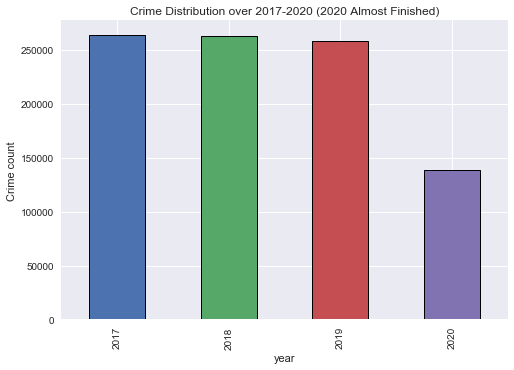

In [146]:
histoy = df.groupby('year').size().plot.bar(edgecolor='black', linewidth=1)
histoy.set_title('Crime Distribution over 2017-2020 (2020 Almost Finished)')
histoy.set_ylabel('Crime count')

Looking above, we see that yearly total of crime for the past few years have been quite consistent around the 260000 mark. Here, 2020 is taken with a grain of salt since the year is not finished yet. There is a small drop of crime (~4600) from 2018 to 2019.

In [147]:
# Which months peak in crime counts?
df.groupby('month').size()

month
1     80759
2     72255
3     77853
4     75671
5     88130
6     87979
7     93013
8     92704
9     67141
10    66103
11    60615
12    61760
dtype: int64

Text(0,0.5,'Crime count')

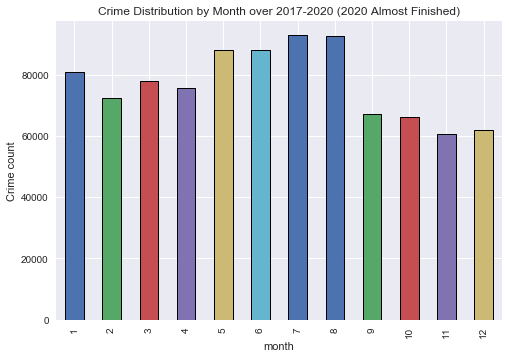

In [148]:
histom = df.groupby('month').size().plot.bar(edgecolor='black', linewidth=1)
histom.set_title('Crime Distribution by Month over 2017-2020 (2020 Almost Finished)')
histom.set_ylabel('Crime count')


As we can see, there is a clear peak in crimes commited in the months of July and Auguest in a four year period. This also means that overall, total crime count spanning the 4 years is likely highest in the summer time. This is a total count so does not entail that the average count of crimes per year is highest in those months. (We can investigate that deeper) We also have to take into accout that year 2020 is not finished but almost finished, so the last few months are expected to grow higher.

In [149]:
# Which hours peak in crime counts?
df.groupby('hour').size()

hour
0     43881
1     28356
2     24346
3     20140
4     16131
5     14155
6     16168
7     22216
8     31693
9     41055
10    41319
11    42765
12    55718
13    44839
14    47506
15    51042
16    50111
17    51088
18    53048
19    52199
20    49000
21    45101
22    44530
23    37576
dtype: int64

Text(0,0.5,'Crime count')

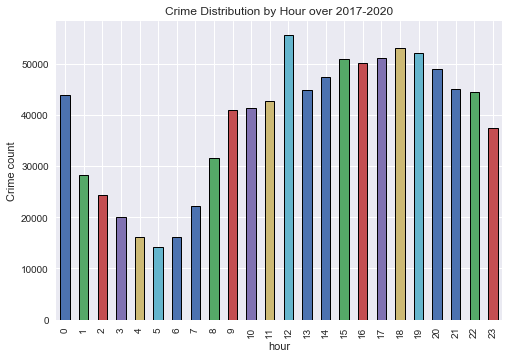

In [150]:
histom = df.groupby('hour').size().plot.bar(edgecolor='black', linewidth=1)
histom.set_title('Crime Distribution by Hour over 2017-2020')
histom.set_ylabel('Crime count')

We can clearly see that highest number of crimes occured mid-day at about lunch time. This is a little surprising as I expected the most crimes to occur at night time right before mid-night or after mid-night. We see from the plot that in fact, crime counts started dropping after mid-night until about 5am and started rising again until mid-day.

In [151]:
# Which day of week peak in crime counts?
df.groupby('dayofweek').size()

dayofweek
0    132540
1    129239
2    129945
3    129196
4    137527
5    134665
6    130871
dtype: int64

Text(0,0.5,'Crime count')

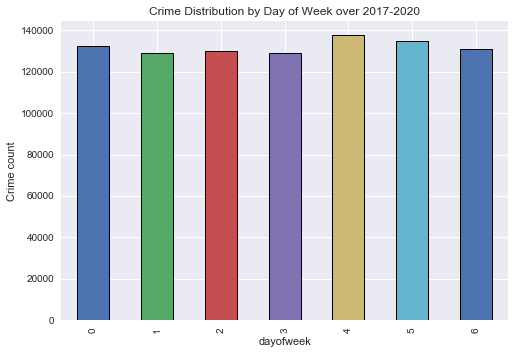

In [152]:
histom = df.groupby('dayofweek').size().plot.bar(edgecolor='black', linewidth=1)
histom.set_title('Crime Distribution by Day of Week over 2017-2020')
histom.set_ylabel('Crime count')

From the values and plots displayed above, there is no noticable big fluctuations in the days that crimes were commited.

In [153]:
# Crime commited during weekday and weekend
df.groupby('weekend').size()

weekend
False    658447
True     265536
dtype: int64

I expected a lot more crimes to be commited during the weekday. After all, weekday consists of 5 days and weekend consists of 2. This is about right on par with my prediction.

In [154]:
# Econ data general summary from 2017-2020
df[['CF', 'CF3', 'PI', 'EUH', 'CH', 'SOI']].describe()

,CF,CF3,PI,EUH,CH,SOI
count,923983.000000,923983.000000,923983.000000,923983.000000,923983.000000,923983.000000
mean,-0.031246,-0.096150,-0.017454,0.000685,-0.027245,0.012769
std,2.412200,1.460084,0.821291,1.091673,0.226276,0.350459
min,-17.801370,-7.371263,-5.681476,-8.690447,-1.292287,-2.137160
25%,-0.106877,-0.124749,-0.158914,0.013828,-0.047026,-0.042424
50%,0.048992,0.033155,0.024743,0.054846,-0.027105,0.010228
75%,0.255773,0.134522,0.131171,0.089021,-0.001929,0.080689
max,5.842036,4.228872,2.269077,1.934996,0.942586,1.193183


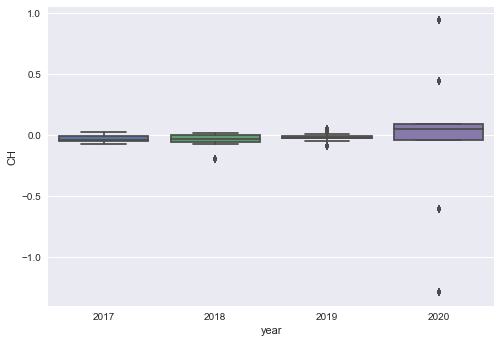

In [155]:
# Box-plot for CH vs. year
box = sns.boxplot(x='year',y='CH',data=df)
sns.set(rc={'figure.figsize':(15,10)})

In [156]:
# Let's check out some correlations

